# Foundations of Data Mining: Assignment 3


Please complete all assignments in this notebook. You should submit this notebook, as well as a PDF version (See File > Download as).

 **Deadline:** Thursday, March 29,  2018

In [5]:
%matplotlib inline
from preamble import *

import sklearn.decomposition as deco
import sklearn.manifold as manifold

plt.rcParams['savefig.dpi'] = 100 # This controls the size of your figures
# Comment out and restart notebook if you only want the last output of each cell.
InteractiveShell.ast_node_interactivity = "none"#"all" 

## PCA and Isomap (5 Points, 1+2+2)

Apply PCA and Isomap to images of handwritten digits (see below). You may use sklearn.decomposition and sklearn.manifold.

### a)  
Compute the first two components of the data using PCA. Make a scatter plot of the data in the first two components of PCA indicating class with color.

### b)
 Compute an Isomap embedding with two components with nr_neighbors={5, 50, N-1} (three separate embeddings).
 For each of the Isomap embeddings, apply the function "align" (see below) with "ref_data" as your computed pca embedding and "data" as the isomap embedding. Show a scatter plot of each of the aligned isomap embeddings.
 
### c)

Visually compare how well the classes are separated in the different scatter plots. What is the effect of changing the number of neighbors on the score computed in the alignment function? What does it mean if the score is zero? When do you expect the score to become zero and why?

More neighbours seems to decrease the computed score. As the number of neighbours increases, the separation of the different classes seems to become more vague. For n=5 the classes seem decently seperated, while for n=50 and n=N-1 there is increasingly more overlap. If the score is zero, it means that the matrix norm of the transformed dataset minus the reference data (y) is zero for one of the 8 transformations. We expect this to happen if the transformed dataset is equal to the reference data for some transformation.


In [6]:
# Load the data set
from sklearn import datasets
digits = datasets.load_digits(n_class=10)
X = digits.data
y = digits.target
N=len(X)

# Align a data set with a reference data set minimizing l_1 error
# Returns aligned data set and alignment error
def align(ref_data, data):
    
    transformations = np.asarray([
        [[0,1],[1,0]], 
        [[0,-1],[1,0]], 
        [[0,1],[-1,0]], 
        [[0,-1],[-1,0]], 
        [[1,0],[0,1]], 
        [[1,0],[0,-1]], 
        [[-1,0],[0,1]], 
        [[-1,0],[0,-1]] 
    ])
    
    score = []
    for i in range(0,8):
        transf_data =   np.matmul(data, transformations[i])
        score.append(np.linalg.norm( transf_data - ref_data, ord=1) )
        #https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.linalg.norm.html
        
    idx = np.argmin(score)
    transf_data = np.matmul(data,transformations[idx])
    
    print("Aligned the data sets. Score is {0:10.1f}  ".format(score[idx]))
    
    return transf_data, score[idx]


1 a


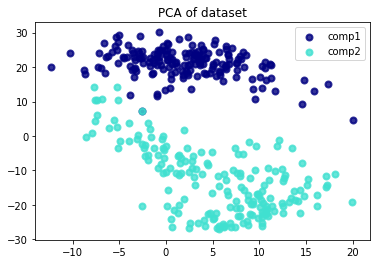

In [7]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_r = pca.fit(X).transform(X)
#print(pca.explained_variance_ratio_)  
#print(pca.singular_values_) 

#print(X_r)

print('1 a')
def printScatter1a():
    plt.figure()
    colors = ['navy', 'turquoise','darkorange']
    lw = 2

    #target_names = ['comp1', 'comp2', 'comp3']
    target_names = ['comp1', 'comp2']

    for color, i, target_name in zip(colors, [0, 1, 2], target_names):
        plt.scatter(X_r[y == i, 0], X_r[y == i, 1], color=color, alpha=.8, lw=lw,
                    label=target_name)
    plt.legend(loc='best', shadow=False, scatterpoints=1)

    plt.title('PCA of dataset')
    
printScatter1a()



1 b
n_neighbours = 5
Aligned the data sets. Score is   102234.2  
n_neighbours = 50
Aligned the data sets. Score is    31067.5  
n_neighbours = N-1
Aligned the data sets. Score is        0.0  


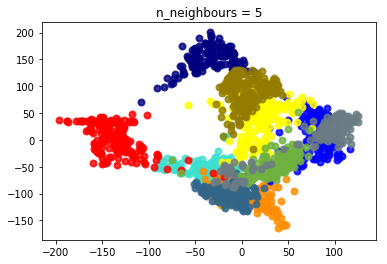

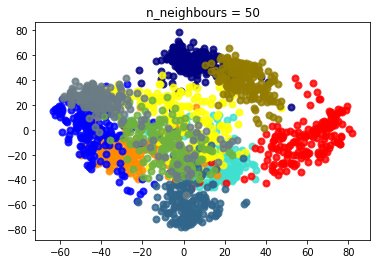

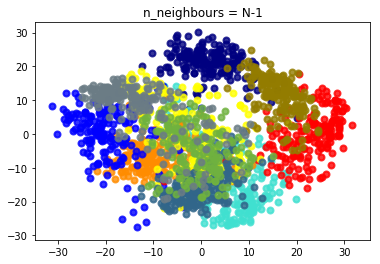

In [8]:
# isomap embedding

from matplotlib import offsetbox
from matplotlib.colors import Colormap
from sklearn import (manifold, datasets, decomposition, ensemble,
                     discriminant_analysis, random_projection)

title = ['n_neighbours = 5', 'n_neighbours = 50', 'n_neighbours = N-1'];    
values = [5,50,N-1];

print('1 b')   
for n, title  in zip(values,title) :
    print(title);
    #print(n);
    X_iso = manifold.Isomap(n_neighbors=n, n_components=2).fit_transform(X)

    X_aligned,score = align(X_r,X_iso)

    plt.figure();
    plt.title(title);
    #plt.scatter(X_iso[:,0],X_iso[:,1])
    #plt.scatter(X_aligned[:,0],X_aligned[:,1])
    
    colors = ['navy', 'turquoise','darkorange', 'blue', 'red', 'yellow', 'xkcd:baby poop',
              'xkcd:ugly blue', 'xkcd:nasty green', 'xkcd:battleship grey'];
    
    for color, i in zip(colors, [0, 1, 2,3,4,5,6,7,8,9]):
        plt.scatter(X_aligned[y == i, 0], X_aligned[y == i, 1], color=color, alpha=.8, lw=2,
                    label=i);
    plt.title(title);


## Classical Multidimensional Scaling (6 Points, 1+2+2+1)

Show that for mean-centered data sets we can recover inner products using
pairwise distance information only. This is used by the isomap embedding algorithm.

We are given all squared pairwise distances of an otherwise unknown
point set ${\bf p}_1,\dots, {\bf p}_n \in \mathbb{R}^d$, i.e., we are given 
for all $1 \leq i,j \leq n$ the values

$$  d_{ij} = \|{\bf p}_i - {\bf p}_j\|^2. $$

We assume that the point set is mean-centered, that is 

$$ \sum_{i=1}^{n} {\bf p}_i = \vec{{\bf 0}}.$$

(where $\vec{{\bf 0}}$ is the vector of zeros)


In the following, $\langle {\bf p}_i , {\bf p}_j \rangle$ denotes the inner 
product of ${\bf p}_i$ and ${\bf p}_j$. 
Prove that the following holds true for mean-centered point sets: 

$$-2 \langle {\bf p}_i , {\bf p}_j \rangle = 
d_{ij}
- \sum_{\ell=1}^{n} \frac{d_{i\ell}}{n}   
-  \sum_{\ell=1}^{n} \frac{d_{j\ell}}{n} 
+ \sum_{k=1}^{n}~ \sum_{\ell=1}^{n} \frac{d_{k\ell}}{n^2} 
$$

You may use the following steps in your derivation.

### a) 
Expand  $d_{ij}$ to yield an expression of $\langle {\bf p}_i, {\bf p}_j \rangle$, $\|{\bf p}_i\|^2$ and $\|{\bf p}_j\|^2$.

### b) 
Show that the following holds for any $ {\bf q} \in \mathbb{R}^d$:
$$ \sum_{1 \leq i \leq n} \langle {\bf p}_i , {\bf q} \rangle =   0$$

### c) 
Prove that 
$$ \|{\bf p}_i\|^2 = \sum_{\ell=1}^{n} \frac{d_{i\ell}}{n} - \sum_{k=1}^{n}~ \sum_{\ell=1}^{n} \frac{d_{k\ell}}{2n^2}$$

### d) 
Combine the steps in your proof. 


## Locality-sensitive hashing (4 Points, 2+1+1)

### a) 

Prove that if the Jaccard Similarity of two sets is $0$, then minhashing always gives a correct estimate of the Jaccard similarity

### b) 
Let $H$ be a family of $(d_1,d_2,p_1,p_2)$-locality-sensitive hash functions.
Assume that $p_2=0$ and assume we have a total numer of $m$ hash
functions from this family available.  Which combination of AND-constructions
and OR-constructions should we use to maximally amplify the hash family?

### (c) 

Let $H$ be a family of $(d_1,d_2,p_1,p_2)$-locality-sensitive hash functions.
Assume that $p_2=\frac{1}{n}$ and assume we have $n$ data points $\bf P$
which are stored in a hash table using a randomly chosen function $h$ from $H$.
Given a query point $\bf q$, we retrieve the points in the hash bucket with index $h(\bf q)$ to search 
for a point which has small distance to $\bf q$. 
Let $X$ be a random variable that is equal to the size of the set 

$$
\begin{aligned}
\left\{{\bf p \in P}~:~ h({\bf p})=h({\bf q}) ~\wedge~ d({\bf p,q}) \geq d_2\right\}\
\end{aligned}
$$

which consists of the false positives of this query.
Derive the expected number of false-positives $E\left[ X \right]$.